# Determine whether a person is covid +ve or not


Note:

The data obtained is from the Mexican government and hence, the analysis is valid for Mexico or maybe North America. The pandemic stats and behaviours are extremely different for Asian countries when compared to North American or European countries owing to far lower case fatality rate for Asia.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\parth\Desktop\Data Mining and Knowledge Discovery\Project/covid.csv')

In [3]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [4]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

# Data Cleaning

In [5]:
for i in df.columns:
    if i in ['id','entry_date','date_symptoms','date_died','age']:
        continue
    else:
        print('unique values in '+ i +' column- ',end=' ')
        print(df[i].unique())

unique values in sex column-  [2 1]
unique values in patient_type column-  [1 2]
unique values in intubed column-  [97  2  1 99]
unique values in pneumonia column-  [ 2  1 99]
unique values in pregnancy column-  [97  2  1 98]
unique values in diabetes column-  [ 2  1 98]
unique values in copd column-  [ 2  1 98]
unique values in asthma column-  [ 2  1 98]
unique values in inmsupr column-  [ 2  1 98]
unique values in hypertension column-  [ 2  1 98]
unique values in other_disease column-  [ 2  1 98]
unique values in cardiovascular column-  [ 2  1 98]
unique values in obesity column-  [ 2  1 98]
unique values in renal_chronic column-  [ 2  1 98]
unique values in tobacco column-  [ 2  1 98]
unique values in contact_other_covid column-  [ 2 99  1]
unique values in covid_res column-  [1 2 3]
unique values in icu column-  [97  2  1 99]


Data descriptors¶

These features are categorical so we convert them into different categories as follows:

(a) Sex

    Female 1
    Male 2

(b) Patient_type

    Outpatient
    Inpatient

(c) Columns with preconditions like pregnancy, diabetes, copd, asthma etc.

    Yes 1
    No 2

(d) Covid result

    Positive  1
    Negative  2 
    Results Awaited  3

The values 97, 98, 99 indicate that the data is not available for these cells.

Okay great! Now that we have the available descriptors of each column, we can move forward with the cleaning and wrangling of the data.

We have to predict whether a person is Covid +ve or -ve based on the preconditions. So let us check the data types of the features given. We also check how many people are Covid positive or negative in this dataset to check how skewed the dataset is.

In [6]:
len(df[df['covid_res']==1])   #Covid Result positive

220657

In [7]:
len(df[df['covid_res']==2])    #Covid Result negative

279035

In [8]:
len(df[df['covid_res']==3])  #Covid result awaited

66910

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

No null values present in the data

Let us convert the date columns to a datetime datatype

### Date Columns

    entry_date
    date_symptoms
    date_died


In [10]:
date_cols=['entry_date','date_symptoms']
for dates in date_cols:
    df[dates]=pd.to_datetime(df[dates],infer_datetime_format=True)

In [11]:
df[date_cols]

,entry_date,date_symptoms
0,2020-04-05,2020-02-05
1,2020-03-19,2020-03-17
2,2020-06-04,2020-01-04
3,2020-04-17,2020-10-04
4,2020-04-13,2020-04-13
...,...,...
566597,2020-05-13,2020-03-05
566598,2020-07-04,2020-06-04
566599,2020-05-14,2020-01-05
566600,2020-05-31,2020-05-29


In [12]:
df1=df
df['date_died'].replace('9999-99-99','Not Applicable',inplace=True)

In [13]:
df=df[['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'age',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu']]

In [14]:
df.iloc[:,6:]=df.iloc[:,6:].replace([97,98,99],np.nan)
df.iloc[:,6:]=df.iloc[:,6:].replace(1,'Yes')
df.iloc[:,6:]=df.iloc[:,6:].replace(2,'No')

df.iloc[:,-2]=df.iloc[:,-2].replace('Yes','Positive')
df.iloc[:,-2]=df.iloc[:,-2].replace('No','Negative')
df.iloc[:,-2]=df.iloc[:,-2].replace(3,'Results awaited')

C:\Users\parth\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,2020-04-05,2020-02-05,Not Applicable,27,NaN,No,NaN,No,...,No,No,No,No,No,No,No,No,Positive,NaN
1,2,1,2020-03-19,2020-03-17,Not Applicable,24,NaN,No,NaN,No,...,No,No,No,No,No,No,No,NaN,Positive,NaN
2,1,2,2020-06-04,2020-01-04,Not Applicable,54,No,No,No,No,...,No,No,No,No,Yes,No,No,NaN,Positive,No
3,2,2,2020-04-17,2020-10-04,Not Applicable,30,No,Yes,NaN,No,...,No,No,No,No,No,No,No,NaN,Positive,No
4,1,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,...,No,Yes,No,Yes,No,No,No,NaN,Positive,No


Text(0.5, 1, 'Null value heatmap')

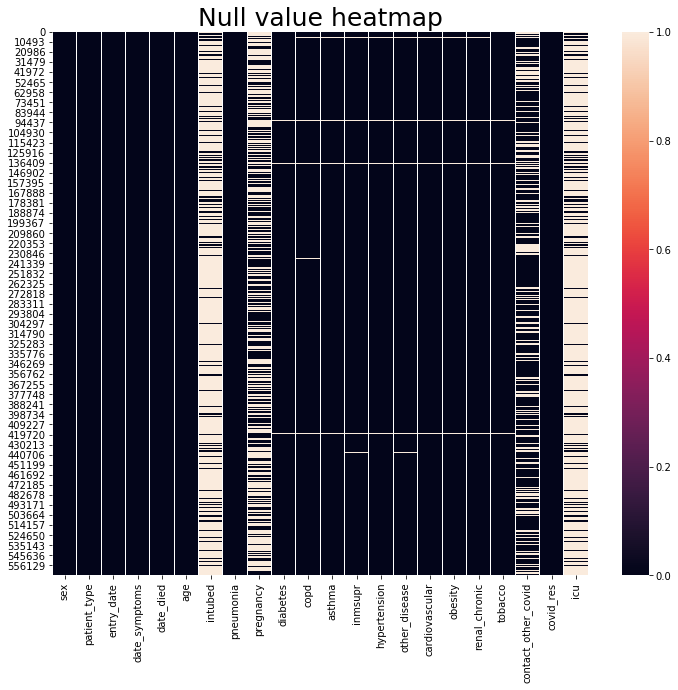

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())
plt.title('Null value heatmap',size=25)

High number of null values can be seen in intubed, pregnancy,contact_other_covid and icu features

Hypothesis

Here, we have to predict whether a person is Covid +ve or -ve based on the preconditions. So, we have proposed following points in our hypothesis and attempt to verify them

    The fatality or the 'date_died' column has no role to play in determining Covid +ve or -ve. So we can drop that column.
    We know that persons suffering from underlying health conditions especially respiratory infection have high chances of being positive. So, we check the preconditions like pneumonia and asthma and whether the person is intubed.
    The column 'contact_other_covid' can also have a crucial role in determining the result as the virus spreads ro rapidly.

So, we attempt to check how these and different other features contribute to person being positive or negative.



Since we are focusing on giving the chances of being affected by corona,so our main focus will be on either chance is positive or negative, hence we'll neglect awaiting chances..
Now here i am dropping all those rows which contains chance is awaiting i.e.2 value


In [17]:
df=df[df['covid_res']!='Results awaited']

### Intubed

In [18]:
df['intubed'].isna().value_counts()

True     392268
False    107424
Name: intubed, dtype: int64

In [19]:
%matplotlib inline

Text(0.5, 1.0, 'Reported intubations \n \n  Ratio=11')

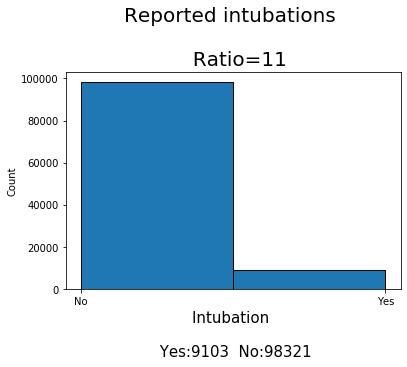

In [20]:
# plt.figure(figsize=(8,10))
ax=plt.hist(df['intubed'][df['intubed'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xlabel('Intubation \n \n Yes:{}  No:{}'.format(df['intubed'].value_counts()[1] , df['intubed'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('Reported intubations \n \n  Ratio={0:.0f}'.format(df['intubed'].value_counts()[0]/df['intubed'].value_counts()[1])
          ,size=20)

In [21]:
# # plt.figure(figsize=(10,8))
# ax2=sns.catplot('intubed',data=df,kind='count',palette='autumn_d',hue='covid_res')
# plt.xticks(size=15,)
# plt.xlabel('Intubation \n \n Yes:{}  No:{}'.format(df['intubed'].value_counts()[1] , df['intubed'].value_counts()[0]),size=15)
# plt.ylabel('Count',size=15)
# plt.title('Reported intubations \n \n  Ratio={0:.0f}'.format(df['intubed'].value_counts()[0]/df['intubed'].value_counts()[1])
#           ,size=20)

## Intubation test positivity

Through this metric we try to understand what are our chances of being COVID +ve if we are intubated.

Text(0.5, 6.79999999999999, 'Results \n Test postivity rate: 71.94 %')

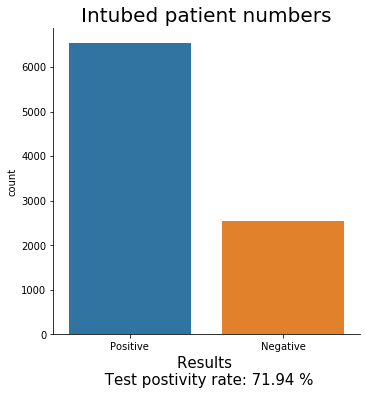

In [22]:
df_intubed=df[df['intubed']=='Yes']
sns.catplot('covid_res',data=df_intubed,kind='count')
plt.title('Intubed patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_intubed['covid_res'].value_counts()[0]/df_intubed['covid_res'].size),size=15)

### Pregnancy

Text(0.5, 1.0, 'Reported pregnancy \n \n  Ratio=67')

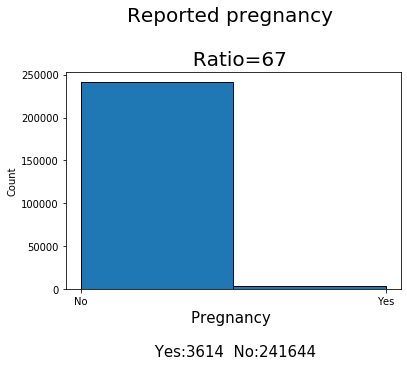

In [23]:
ax=plt.hist(df['pregnancy'][df['pregnancy'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xlabel('Pregnancy \n \n Yes:{}  No:{}'.format(df['pregnancy'].value_counts()[1] , df['pregnancy'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('Reported pregnancy \n \n  Ratio={0:.0f}'.format(df['pregnancy'].value_counts()[0]/df['pregnancy'].value_counts()[1])
          ,size=20)

## Pregnancy test positivity

Through this metric we try to understand what are our chances of being COVID +ve if we are intubated.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

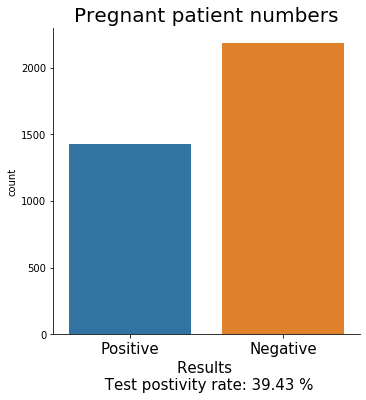

In [24]:
df_pregnancy=df[df['pregnancy']=='Yes']
sns.catplot('covid_res',data=df_pregnancy,kind='count')
plt.title('Pregnant patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_pregnancy['covid_res'].value_counts()[1]/df_pregnancy['covid_res'].size),size=15)
plt.xticks(size=15)

## Contacted Other Covid+

Text(0.5, 1.0, 'contact_other_covid \n \n  Ratio=1.32')

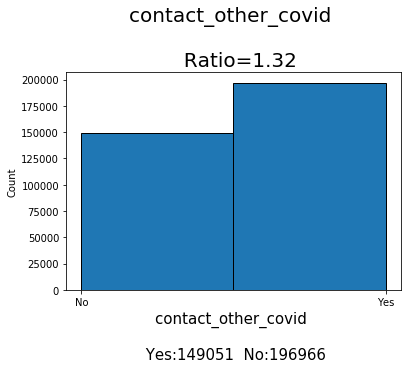

In [25]:
ax=plt.hist(df['contact_other_covid'][df['contact_other_covid'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xlabel('contact_other_covid \n \n Yes:{}  No:{}'.format(df['contact_other_covid'].value_counts()[1] , df['contact_other_covid'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('contact_other_covid \n \n  Ratio={0:.02f}'.format(df['contact_other_covid'].value_counts()[0]/df['contact_other_covid'].value_counts()[1])
          ,size=20)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

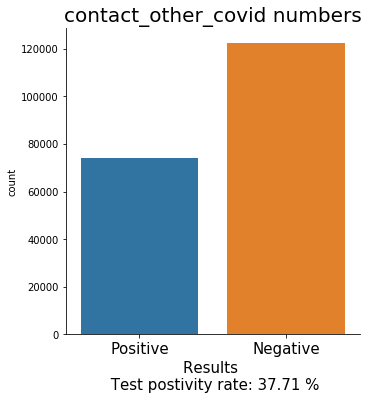

In [26]:
df_contact_other_covid=df[df['contact_other_covid']=='Yes']
sns.catplot('covid_res',data=df_contact_other_covid,kind='count')
plt.title('contact_other_covid numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_contact_other_covid['covid_res'].value_counts()[1]/df_contact_other_covid['covid_res'].size),size=15)
plt.xticks(size=15)

## ICU

Text(0.5, 1.0, 'icu \n \n  Ratio=11')

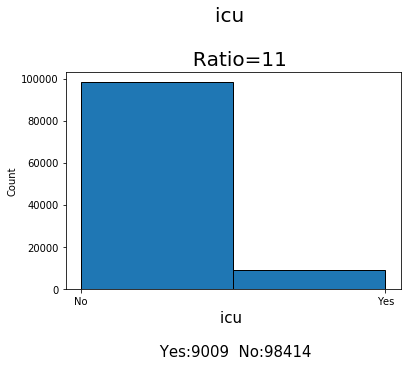

In [27]:
ax=plt.hist(df['icu'][df['icu'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xlabel('icu \n \n Yes:{}  No:{}'.format(df['icu'].value_counts()[1] , df['icu'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('icu \n \n  Ratio={0:.0f}'.format(df['icu'].value_counts()[0]/df['icu'].value_counts()[1])
          ,size=20)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

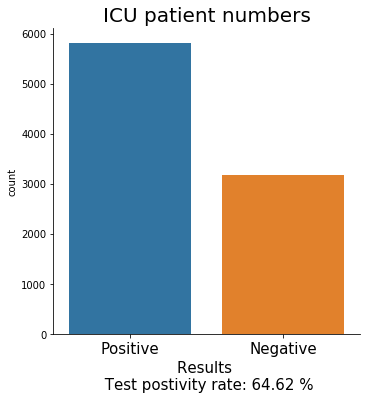

In [28]:
df_icu=df[df['icu']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('ICU patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
plt.xticks(size=15)

##  Disease Reported Analysis

In [29]:
df.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'age', 'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

Text(0.5, 1.0, 'tobacco Ratio=11')

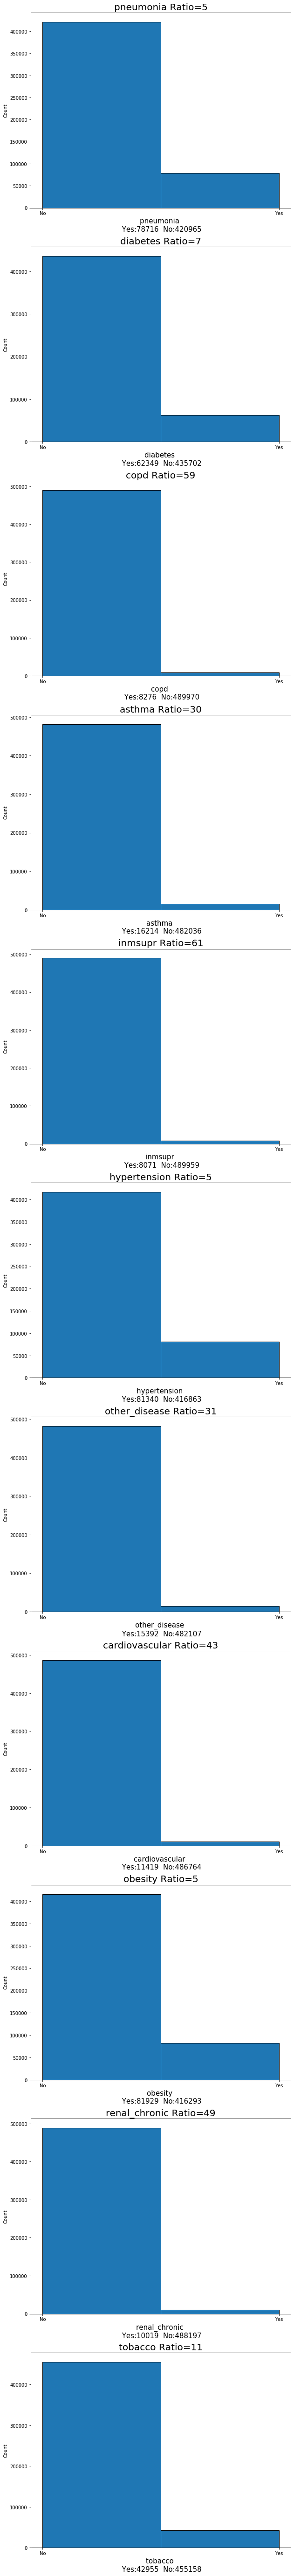

In [30]:
fig2=plt.figure(figsize=(22,100))

ax1=fig2.add_subplot(11,2,1)
plt.hist(df['pneumonia'][df['pneumonia'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('pneumonia \n Yes:{}  No:{}'.format(df['pneumonia'].value_counts()[1] , df['pneumonia'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('pneumonia Ratio={0:.0f}'.format(df['pneumonia'].value_counts()[0]/df['pneumonia'].value_counts()[1])
          ,size=20)

# ax2=fig2.add_subplot(11,2,2)
# df_pneumonia=df[df['pneumonia']=='Yes']
# sns.catplot('covid_res',data=df_pneumonia,kind='count')
# plt.title('pneumonia patient numbers',size=20)
# plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
#     100* df_pneumonia['covid_res'].value_counts()[0]/df_pneumonia['covid_res'].size),size=15)
# plt.xticks(size=10,)

ax3=fig2.add_subplot(11,2,3)
plt.hist(df['diabetes'][df['diabetes'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('diabetes \n Yes:{}  No:{}'.format(df['diabetes'].value_counts()[1] , df['diabetes'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('diabetes Ratio={0:.0f}'.format(df['diabetes'].value_counts()[0]/df['diabetes'].value_counts()[1])
          ,size=20)

# ax4=fig2.add_subplot(11,2,4)
# # df_icu=df[df['diabetes']=='Yes']
# # sns.catplot('covid_res',data=df_icu,kind='count')
# # plt.title('diabetes patient numbers',size=20)
# # plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
# #     100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
# # plt.xticks(size=15)

ax5=fig2.add_subplot(11,2,5)
plt.hist(df['copd'][df['copd'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('copd \n Yes:{}  No:{}'.format(df['copd'].value_counts()[1] , df['copd'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('copd Ratio={0:.0f}'.format(df['copd'].value_counts()[0]/df['copd'].value_counts()[1])
          ,size=20)

# ax6=fig2.add_subplot(11,2,6)
# # df_icu=df[df['icu']=='Yes']
# # sns.catplot('covid_res',data=df_icu,kind='count')
# # plt.title('ICU patient numbers',size=20)
# # plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
# #     100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
# # plt.xticks(size=15)

ax7=fig2.add_subplot(11,2,7)
plt.hist(df['asthma'][df['asthma'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('asthma \n Yes:{}  No:{}'.format(df['asthma'].value_counts()[1] , df['asthma'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('asthma Ratio={0:.0f}'.format(df['asthma'].value_counts()[0]/df['asthma'].value_counts()[1])
          ,size=20)

# ax8=fig2.add_subplot(11,2,8)
# # df_icu=df[df['icu']=='Yes']
# # sns.catplot('covid_res',data=df_icu,kind='count')
# # plt.title('ICU patient numbers',size=20)
# # plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
# #     100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
# # plt.xticks(size=15)

ax9=fig2.add_subplot(11,2,9)
plt.hist(df['inmsupr'][df['inmsupr'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('inmsupr \n Yes:{}  No:{}'.format(df['inmsupr'].value_counts()[1] , df['inmsupr'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('inmsupr Ratio={0:.0f}'.format(df['inmsupr'].value_counts()[0]/df['inmsupr'].value_counts()[1])
          ,size=20)

# ax10=fig2.add_subplot(11,2,10)

ax11=fig2.add_subplot(11,2,11)
plt.hist(df['hypertension'][df['hypertension'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('hypertension \n Yes:{}  No:{}'.format(df['hypertension'].value_counts()[1] , df['hypertension'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('hypertension Ratio={0:.0f}'.format(df['hypertension'].value_counts()[0]/df['hypertension'].value_counts()[1])
          ,size=20)

# ax12=fig2.add_subplot(11,2,12)

ax13=fig2.add_subplot(11,2,13)
plt.hist(df['other_disease'][df['other_disease'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('other_disease \n Yes:{}  No:{}'.format(df['other_disease'].value_counts()[1] , df['other_disease'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('other_disease Ratio={0:.0f}'.format(df['other_disease'].value_counts()[0]/df['other_disease'].value_counts()[1])
          ,size=20)

# ax14=fig2.add_subplot(11,2,14)

ax15=fig2.add_subplot(11,2,15)
plt.hist(df['cardiovascular'][df['cardiovascular'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('cardiovascular \n Yes:{}  No:{}'.format(df['cardiovascular'].value_counts()[1] , df['cardiovascular'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('cardiovascular Ratio={0:.0f}'.format(df['cardiovascular'].value_counts()[0]/df['cardiovascular'].value_counts()[1])
          ,size=20)

# ax16=fig2.add_subplot(11,2,16)

ax17=fig2.add_subplot(11,2,17)
plt.hist(df['obesity'][df['obesity'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('obesity \n Yes:{}  No:{}'.format(df['obesity'].value_counts()[1] , df['obesity'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('obesity Ratio={0:.0f}'.format(df['obesity'].value_counts()[0]/df['obesity'].value_counts()[1])
          ,size=20)

# ax18=fig2.add_subplot(11,2,18)

ax19=fig2.add_subplot(11,2,19)
plt.hist(df['renal_chronic'][df['renal_chronic'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('renal_chronic \n Yes:{}  No:{}'.format(df['renal_chronic'].value_counts()[1] , df['renal_chronic'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('renal_chronic Ratio={0:.0f}'.format(df['renal_chronic'].value_counts()[0]/df['renal_chronic'].value_counts()[1])
          ,size=20)

# ax20=fig2.add_subplot(11,2,20)

ax21=fig2.add_subplot(11,2,21)
plt.hist(df['tobacco'][df['tobacco'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('tobacco \n Yes:{}  No:{}'.format(df['tobacco'].value_counts()[1] , df['tobacco'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('tobacco Ratio={0:.0f}'.format(df['tobacco'].value_counts()[0]/df['tobacco'].value_counts()[1])
          ,size=20)

# ax22=fig2.add_subplot(11,2,22)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

<Figure size 1584x7200 with 0 Axes>

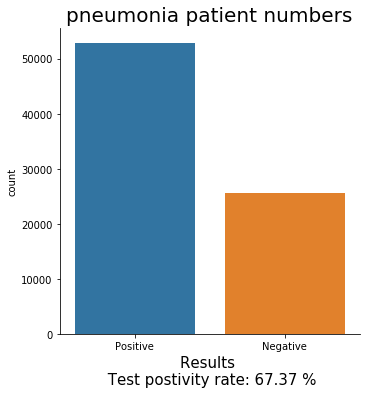

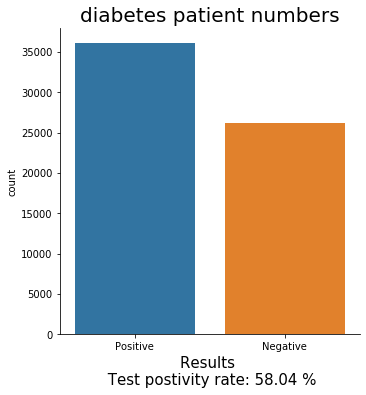

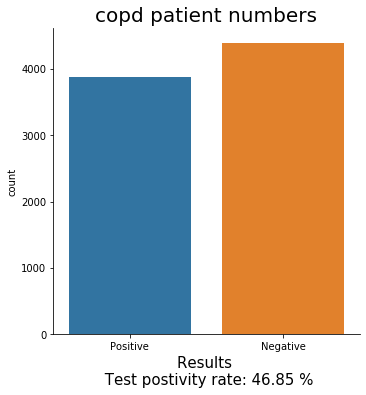

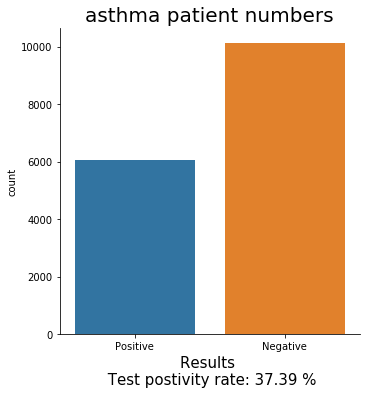

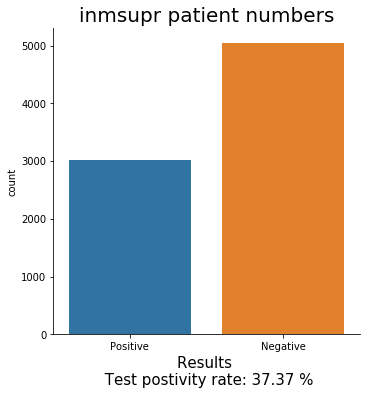

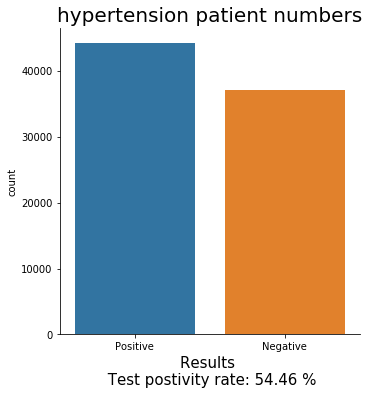

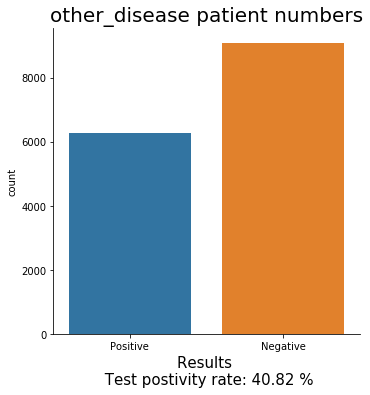

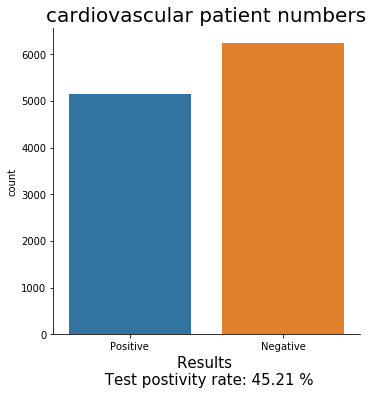

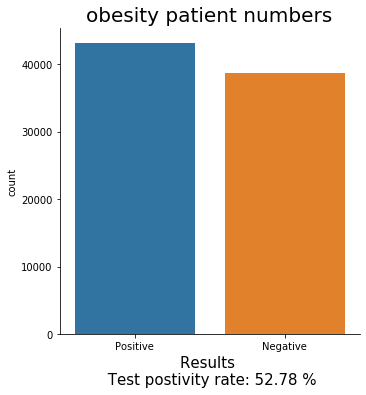

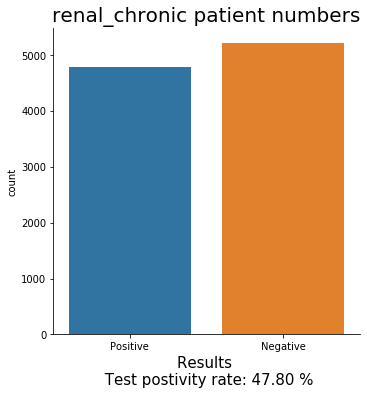

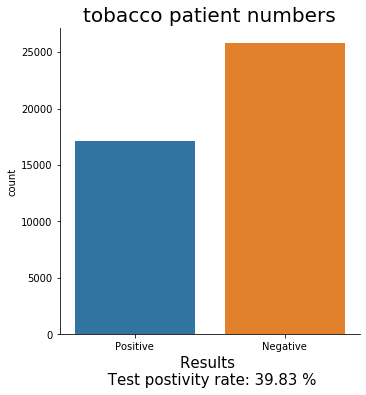

In [31]:
fig2=plt.figure(figsize=(22,100))

# ax1=fig2.add_subplot(11,2,1)
df_pneumonia=df[df['pneumonia']=='Yes']
sns.catplot('covid_res',data=df_pneumonia,kind='count')
plt.title('pneumonia patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_pneumonia['covid_res'].value_counts()[0]/df_pneumonia['covid_res'].size),size=15)
plt.xticks(size=10,)

# ax2=fig2.add_subplot(11,2,2)


# ax3=fig2.add_subplot(11,2,3)
df_icu=df[df['diabetes']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('diabetes patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax4=fig2.add_subplot(11,2,4)


# ax5=fig2.add_subplot(11,2,5)
df_icu=df[df['copd']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('copd patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax6=fig2.add_subplot(11,2,6)
# # df_icu=df[df['icu']=='Yes']
# # sns.catplot('covid_res',data=df_icu,kind='count')
# # plt.title('ICU patient numbers',size=20)
# # plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
# #     100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
# # plt.xticks(size=15)

# ax7=fig2.add_subplot(11,2,7)
df_icu=df[df['asthma']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('asthma patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax8=fig2.add_subplot(11,2,8)
# # df_icu=df[df['icu']=='Yes']
# # sns.catplot('covid_res',data=df_icu,kind='count')
# # plt.title('ICU patient numbers',size=20)
# # plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
# #     100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
# # plt.xticks(size=15)

# ax9=fig2.add_subplot(11,2,9)
df_icu=df[df['inmsupr']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('inmsupr patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax10=fig2.add_subplot(11,2,10)

# ax11=fig2.add_subplot(11,2,11)
df_icu=df[df['hypertension']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('hypertension patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax12=fig2.add_subplot(11,2,12)

# ax13=fig2.add_subplot(11,2,13)
df_icu=df[df['other_disease']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('other_disease patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax14=fig2.add_subplot(11,2,14)

# ax15=fig2.add_subplot(11,2,15)
df_icu=df[df['cardiovascular']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('cardiovascular patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax16=fig2.add_subplot(11,2,16)

# ax17=fig2.add_subplot(11,2,17)
df_icu=df[df['obesity']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('obesity patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax18=fig2.add_subplot(11,2,18)

# ax19=fig2.add_subplot(11,2,19)
df_icu=df[df['renal_chronic']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('renal_chronic patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax20=fig2.add_subplot(11,2,20)

# ax21=fig2.add_subplot(11,2,21)
df_icu=df[df['tobacco']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('tobacco patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax22=fig2.add_subplot(11,2,22)

## Age Band

In [32]:
df1=df
df1
df1.iloc[:,-2]=df.iloc[:,-2].replace('Positive',1)
df1.iloc[:,-2]=df.iloc[:,-2].replace('Negative',0)
# df1.iloc[:,-2]=df.iloc[:,-2].replace('Results awaited',3)
df1
df1 = df1[df1['covid_res']!=3]

In [33]:
def age_band(age):
    
    if age<2:
        return '0-2'
    elif (age>1) and (age<11):
        return '2-10'
    elif (age>10 and age<21):
        return '10-20'
    elif (age>20 and age<31):
        return '20-30'
    elif (age>30 and age<41):
        return '30-40'
    elif (age>40 and age<51):
        return '40-50'
    elif (age>50 and age<61):
        return '50-60'
    elif (age>60 and age<81):
        return '60-80'
    else:
        return 'Above 80'

In [34]:
# df_pos=df1[df1['covid_res']=='Positive']
df1['Age_band']=df1['age'].apply(age_band)
df1['Count']=1
df_Age_Band = df1.groupby('Age_band')['covid_res','Count'].sum().reset_index()
df_Age_Band.sort_values(by='covid_res',ascending=False).reset_index(drop=True)
df_Age_Band['Percentage_covid_positive']=100*df_Age_Band.covid_res/df_Age_Band.Count


C:\Users\parth\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [35]:
# df1

C:\Users\parth\anaconda3\lib\site-packages\seaborn\categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Covid Positive vs Age group')

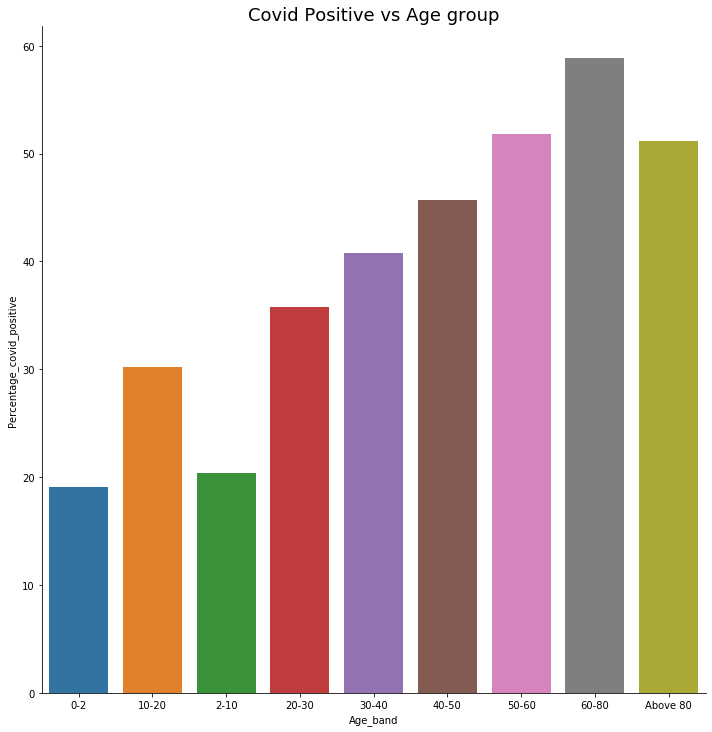

In [36]:
sns.catplot(x = 'Age_band', y ='Percentage_covid_positive', data = df_Age_Band, kind= 'bar', size = 10)
plt.title('Covid Positive vs Age group', size = 18)

## Sex

In [37]:
df['sex'].replace(1,'Female',inplace=True)
df['sex'].replace(2,'Male',inplace=True)

Gender distribution in Data

Text(0.5, 0, 'Male- 287112    Female-279486')

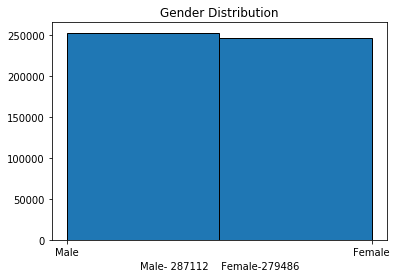

In [38]:
plt.hist(df['sex'],bins=2,edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Male- 287112    Female-279486')

In [39]:
df_pos=df[df['covid_res']==1]
# df_pos

Text(0.5, 0, 'Male- 42.1%    Female-35.7%')

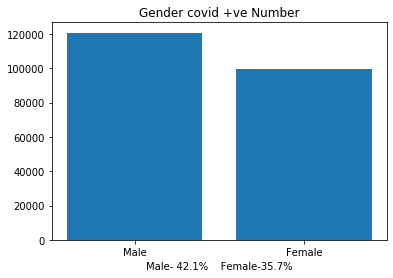

In [40]:
pos=[120799,99858]
gen=['Male','Female']
plt.bar(gen,pos)#,edgecolor='black')
plt.title('Gender covid +ve Number')

plt.xlabel('Male- 42.1%    Female-35.7%')

In [41]:
len(df_pos[df_pos['sex']=='Male'])

120799

Text(0.5, 1.0, 'Gender wise covid+ve age distribution')

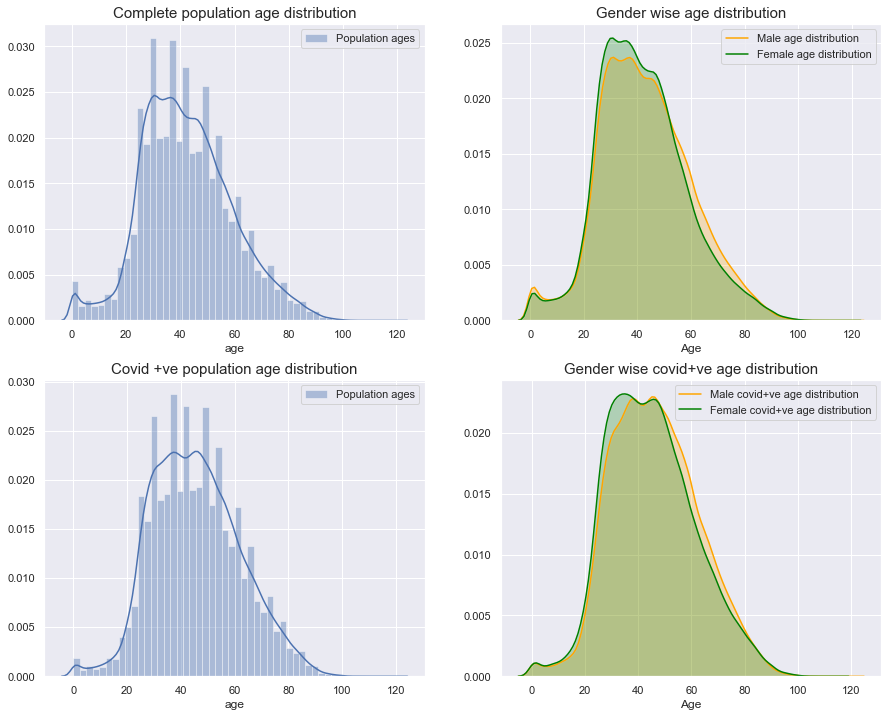

In [42]:
sns.set()
fig1=plt.figure(figsize=(15,12))
ax1=fig1.add_subplot(221)
a=sns.distplot(df['age'],ax=ax1,label='Population ages')
ax1.legend()
ax1.set_title('Complete population age distribution',size=15)
ax2=fig1.add_subplot(222)

df_m=df[df['sex']=='Male']
df_f=df[df['sex']=='Female']

b=sns.kdeplot(df_m['age'],shade=True,ax=ax2,label='Male age distribution',color='orange')
c=sns.kdeplot(df_f['age'],ax=ax2,label='Female age distribution',color='green',shade=True)
ax2.set_xlabel('Age')
ax2.set_title('Gender wise age distribution',size=15)
ax3=fig1.add_subplot(223)
a=sns.distplot(df_pos['age'],ax=ax3,label='Population ages')
ax3.legend()
ax3.set_title('Covid +ve population age distribution',size=15)
ax4=fig1.add_subplot(224)

df_m_pos=df_pos[df_pos['sex']=='Male']
df_f_pos=df_pos[df_pos['sex']=='Female']

b=sns.kdeplot(df_m_pos['age'],shade=True,ax=ax4,label='Male covid+ve age distribution',color='orange')
c=sns.kdeplot(df_f_pos['age'],ax=ax4,label='Female covid+ve age distribution',color='green',shade=True)
ax4.set_xlabel('Age')
ax4.set_title('Gender wise covid+ve age distribution',size=15)



From the above left graph, we can see that we have a bimodal graph with high distribution from 20-60 years. There is also a peak in the lower section of the graph meaning we have high number of infants in our distribution.

On the right, we see that the distribution for both women and men is nearly identical. This is great because it will let us understand the body responses of the sexes with an identical age distribution.

# Chi Square Test 

In [81]:
arr=['sex','patient_type','intubed','pneumonia','pregnancy', 'diabetes','copd','asthma','inmsupr','hypertension',
    'other_disease', 'cardiovascular','obesity', 'renal_chronic', 'tobacco', 'contact_other_covid','icu']
for i in arr:
    df_test=df[['covid_res',i]]
    dataset_table=pd.crosstab(df_test[i],df_test['covid_res'])
    df_test=df_test.dropna()
    val=stats.chi2_contingency(dataset_table)
    Expected_Values=val[3]
    Observed_Values = dataset_table.values 
    
    no_of_rows=len(dataset_table.iloc[0:2,0])
    no_of_columns=len(dataset_table.iloc[0,0:2])
    ddof=(no_of_rows-1)*(no_of_columns-1)
#     print("Degree of Freedom:-",ddof)
    alpha = 0.05
    from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between covid_res and "+i)
    else:
        print("Retain H0,There is no relationship between covid_res and "+i)

#     print("chi-square statistic:-",chi_square_statistic)

Reject H0,There is a relationship between covid_res and sex
Reject H0,There is a relationship between covid_res and patient_type
Reject H0,There is a relationship between covid_res and intubed
Reject H0,There is a relationship between covid_res and pneumonia
Retain H0,There is no relationship between covid_res and pregnancy
Reject H0,There is a relationship between covid_res and diabetes
Reject H0,There is a relationship between covid_res and copd
Reject H0,There is a relationship between covid_res and asthma
Reject H0,There is a relationship between covid_res and inmsupr
Reject H0,There is a relationship between covid_res and hypertension
Reject H0,There is a relationship between covid_res and other_disease
Reject H0,There is a relationship between covid_res and cardiovascular
Reject H0,There is a relationship between covid_res and obesity
Reject H0,There is a relationship between covid_res and renal_chronic
Reject H0,There is a relationship between covid_res and tobacco
Reject H0,The

### Case load

In this particular section, we will check how the case loads vary across the dates. Moreover, we will also check the number of days since hospitalisation and symptoms and see if there are any relations with covid +ve.

In [43]:
df['delta']=abs(df['entry_date']-df['date_symptoms'])
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,delta
0,Male,1,2020-04-05,2020-02-05,Not Applicable,27,NaN,No,NaN,No,...,No,No,No,No,No,No,No,1,NaN,60 days
1,Male,1,2020-03-19,2020-03-17,Not Applicable,24,NaN,No,NaN,No,...,No,No,No,No,No,No,NaN,1,NaN,2 days
2,Female,2,2020-06-04,2020-01-04,Not Applicable,54,No,No,No,No,...,No,No,No,Yes,No,No,NaN,1,No,152 days
3,Male,2,2020-04-17,2020-10-04,Not Applicable,30,No,Yes,NaN,No,...,No,No,No,No,No,No,NaN,1,No,170 days
4,Female,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,...,Yes,No,Yes,No,No,No,NaN,1,No,0 days




The delta section in the above dataframe basically shows the number of days since first symptoms and hospitalisation.

First, let us check the case loads of COVID +ve on each of the dates.


In [44]:
df['Count']=1
df_case_load=df.groupby('entry_date')['Count'].count().reset_index()
df_case_load.sort_values(by='entry_date',inplace=True)
df_case_load.head()


,entry_date,Count
0,2020-01-01,5
1,2020-01-02,8
2,2020-01-03,27
3,2020-01-04,1580
4,2020-01-05,3010


(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699., 737730., 737760.]),
 <a list of 11 Text xticklabel objects>)

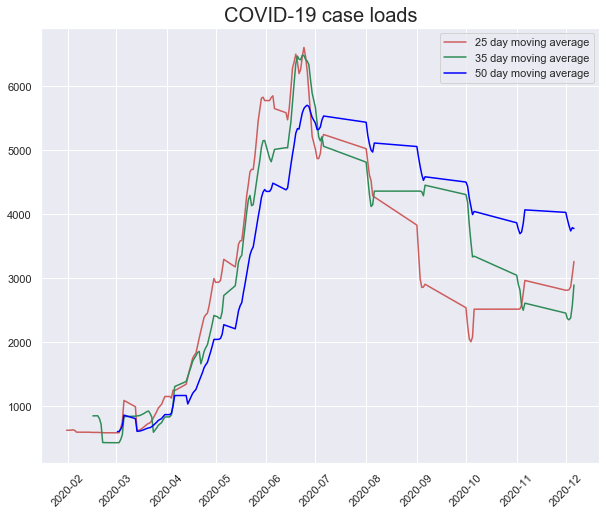

In [45]:
fig1=plt.figure(figsize=(10,8))
ax1=fig1.add_subplot(111)

df_case_load['Moving average_25']=df_case_load['Count'].rolling(25).mean()
df_case_load['Moving average_35']=df_case_load['Count'].rolling(35).mean()
df_case_load['Moving average_50']=df_case_load['Count'].rolling(50).mean()

ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_25'],label='25 day moving average',color='indianred')
ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_35'],label='35 day moving average',color='seagreen')
ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_50'],label='50 day moving average',color='blue')

plt.legend()
plt.title('COVID-19 case loads',size=20)
plt.xticks(rotation=45)



From the above moving average curve, it seems like the infections spread very quickly since the start of April 2020 at an exponential rate. After the month of July 2020, there seems to be a gradual decrease in number of incoming COVID +ve patients.

In [46]:
df_pos=df[df['covid_res']==1]
df_pos

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,delta,Count
0,Male,1,2020-04-05,2020-02-05,Not Applicable,27,NaN,No,NaN,No,...,No,No,No,No,No,No,1,NaN,60 days,1
1,Male,1,2020-03-19,2020-03-17,Not Applicable,24,NaN,No,NaN,No,...,No,No,No,No,No,NaN,1,NaN,2 days,1
2,Female,2,2020-06-04,2020-01-04,Not Applicable,54,No,No,No,No,...,No,No,Yes,No,No,NaN,1,No,152 days,1
3,Male,2,2020-04-17,2020-10-04,Not Applicable,30,No,Yes,NaN,No,...,No,No,No,No,No,NaN,1,No,170 days,1
4,Female,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,...,No,Yes,No,No,No,NaN,1,No,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220652,Female,2,2020-10-06,2020-08-06,10-06-2020,88,No,Yes,No,Yes,...,No,No,No,No,No,NaN,1,No,61 days,1
220653,Female,1,2020-11-06,2020-01-06,Not Applicable,30,NaN,No,No,No,...,No,No,No,No,No,NaN,1,NaN,305 days,1
220654,Female,1,2020-11-06,2020-10-06,Not Applicable,27,NaN,No,No,No,...,No,No,No,No,No,No,1,NaN,31 days,1
220655,Female,1,2020-06-19,2020-06-16,Not Applicable,36,NaN,No,No,No,...,No,No,No,No,No,Yes,1,NaN,3 days,1


In [47]:
df['delta'].value_counts()[0:6]

0 days    78858
2 days    39714
3 days    37190
1 days    36478
4 days    28088
5 days    21274
Name: delta, dtype: int64

In [48]:
df_delta=df[df['delta']<'8 days']

In [49]:


df_delta['Time gap']=df_delta['delta'].astype(str)

df_split=df_delta['Time gap'].str.rsplit('00',expand=True)
df_delta['Time gap']=df_split.iloc[:,0]

C:\Users\parth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\parth\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


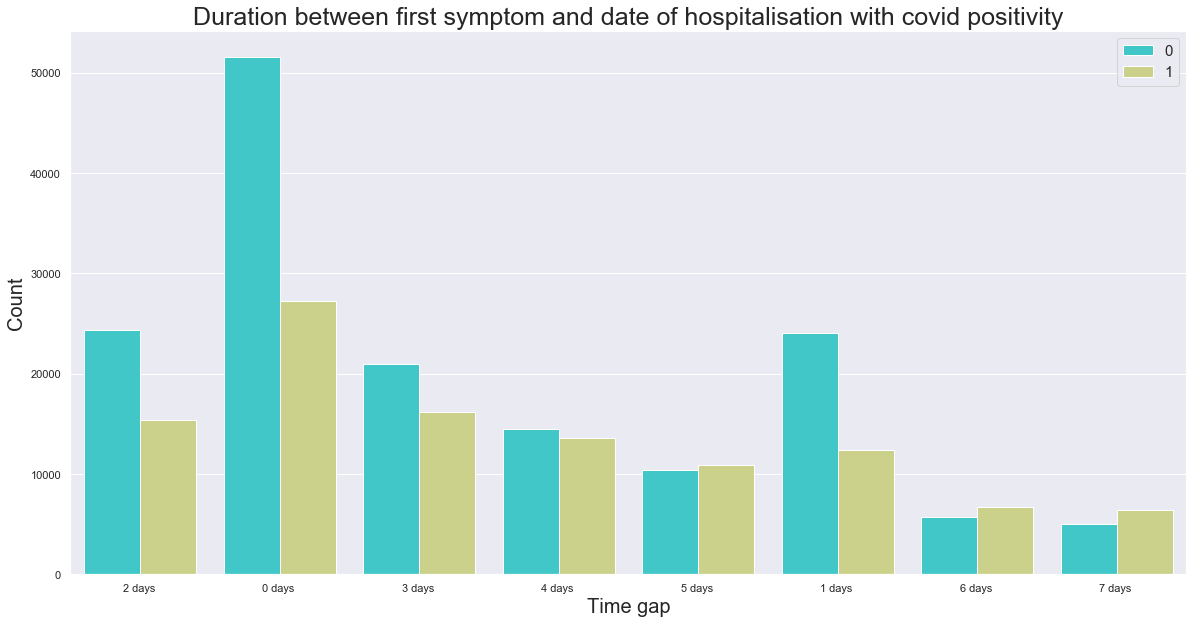

In [50]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(111)

g=sns.countplot('Time gap',hue='covid_res',data=df_delta,palette='rainbow',ax=ax1)
ax1.set_ylabel('Count',size=20)
ax1.set_xlabel('Time gap',size=20)
ax1.set_title('Duration between first symptom and date of hospitalisation with covid positivity',size=25)
ax1.legend(fontsize=15)

In [51]:
df_pos=df[df['covid_res']==1]
df_pos.reset_index(drop=True,inplace=True)
df_pos['Fatal']=np.nan

i=0
for i in range(len(df_pos)):
    if df_pos['date_died'][i]!='Not Applicable':
        df_pos['Fatal'][i]='Yes'

df_pos['Fatal']=df_pos['Fatal'].fillna('No')

C:\Users\parth\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\parth\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\parth\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [52]:
df_pos['Fatal']

0          No
1          No
2          No
3          No
4         Yes
         ... 
220652    Yes
220653     No
220654     No
220655     No
220656     No
Name: Fatal, Length: 220657, dtype: object

Text(0.5, 1, 'Gender wise COVID +ve results')

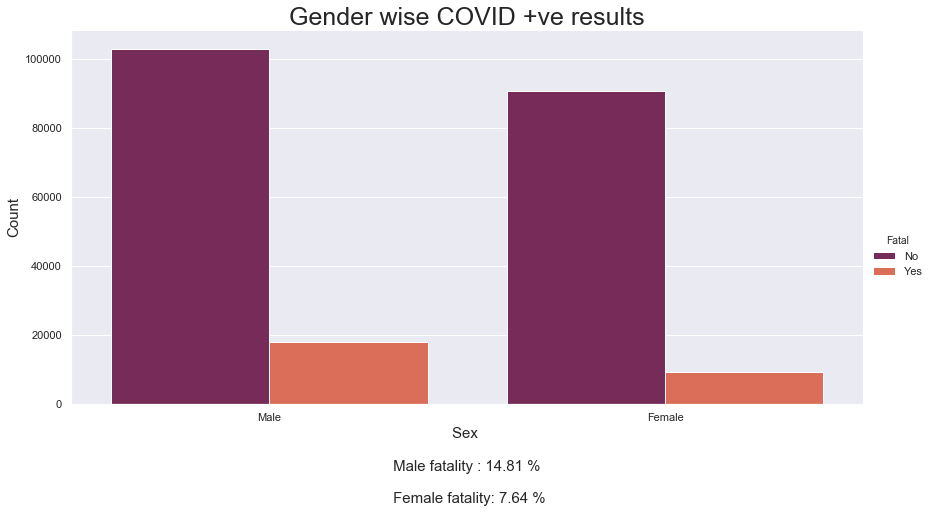

In [53]:
df_m_pos=df_pos[df_pos['sex']=='Male']
df_f_pos=df_pos[df_pos['sex']=='Female']


sns.catplot('sex',data=df_pos,hue='Fatal',kind='count',palette='rocket',aspect=2,height=6)
plt.xlabel('Sex \n \n Male fatality : {0:.2f} % \n \n Female fatality: {1:.2f} %'.format(100*df_m_pos['Fatal'].value_counts()[1]/df_m_pos.shape[0],100*df_f_pos['Fatal'].value_counts()[1]/df_m_pos.shape[0]),size=15)
plt.ylabel('Count',size=15)
plt.title('Gender wise COVID +ve results',size=25)

Text(0.5, 0, 'Fatality rate: 15.70 %')

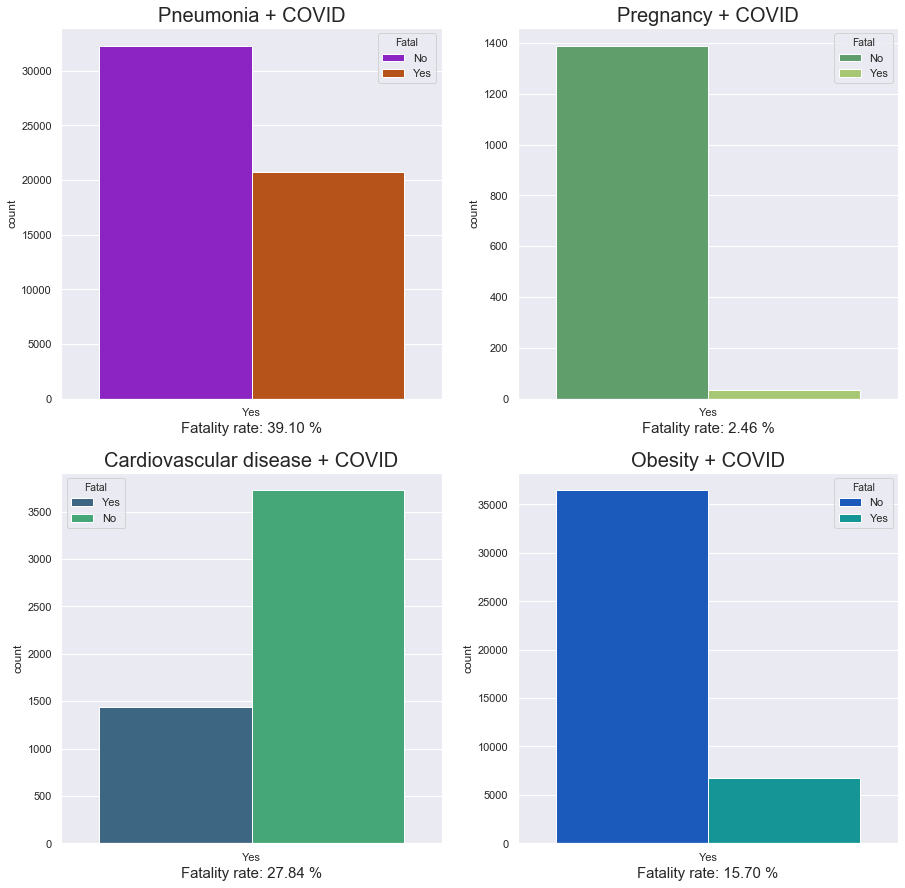

In [54]:
fig2=plt.figure(figsize=(15,15))
ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)
df_pneu=df_pos[df_pos['pneumonia']=='Yes']
df_preg=df_pos[df_pos['pregnancy']=='Yes']
df_card=df_pos[df_pos['cardiovascular']=='Yes']
df_obes=df_pos[df_pos['obesity']=='Yes']


sns.countplot('pneumonia',data=df_pneu,hue='Fatal',ax=ax1,palette='gnuplot')
sns.countplot('pregnancy',data=df_preg,hue='Fatal',ax=ax2,palette='summer')
sns.countplot('cardiovascular',data=df_card,hue='Fatal',ax=ax3,palette='viridis')
sns.countplot('obesity',data=df_obes,hue='Fatal',ax=ax4,palette='winter')

ax1.set_title('Pneumonia + COVID',size=20)
ax2.set_title('Pregnancy + COVID',size=20)
ax3.set_title('Cardiovascular disease + COVID',size=20)
ax4.set_title('Obesity + COVID',size=20)






ax1.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_pneu['Fatal'].value_counts()[1]/df_pneu['Fatal'].shape[0]),size=15)


ax2.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_preg['Fatal'].value_counts()[1]/df_preg['Fatal'].shape[0]),size=15)


ax3.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_card['Fatal'].value_counts()[1]/df_card['Fatal'].shape[0]),size=15)


ax4.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_obes['Fatal'].value_counts()[1]/df_obes['Fatal'].shape[0]),size=15)